# Imports

In [1]:
import os 
import zipfile 
import tensorflow as tf 
import numpy as np
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder

In [2]:
np.random.seed=42

# Data Generation

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [4]:
train_path="../data/google_images/train"
test_path="../data/google_images/test"
val_path="../data/google_images/val"

In [5]:
class_list = os.listdir(train_path)

In [6]:
x_train=[]
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)	#convert from BGR format to RGB format
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

x_test=[]
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)	#convert from BGR format to RGB format
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)

x_val=[]
for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)	#convert from BGR format to RGB format
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)

In [7]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [8]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
val_generator = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1615 images belonging to 50 classes.
Found 538 images belonging to 50 classes.
Found 426 images belonging to 50 classes.


In [11]:
class_dict = test_generator.class_indices
labels = test_generator.labels
file_names = test_generator.filenames

In [14]:
train_y = train_generator.classes
test_y = test_generator.classes
val_y = val_generator.classes

In [15]:
train_y.shape,test_y.shape,val_y.shape

((1615,), (538,), (426,))

# Basic CNN

In [16]:
# Instantiate a CNN.
cnn_model = Sequential()

In [17]:
# Add a convolutional layer.
cnn_model.add(Conv2D(filters=6,            # number of filters
                     kernel_size=(3, 3),        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(224, 224, 3))) # shape of input (image)

In [18]:
cnn_model.add(MaxPooling2D(pool_size=(2, 2))) # dimensions of region of pooling

In [19]:
cnn_model.add(Conv2D(16,
                     kernel_size = (3, 3),
                     activation='relu'))

In [20]:
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

In [21]:
cnn_model.add(Flatten())

In [22]:
# Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(128, activation='relu'))

In [23]:
# Add a final layer with 50 neurons.
cnn_model.add(Dense(len(class_list), activation='softmax'))

In [24]:
# Compile model
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [25]:
# Include checkpoint 

checkpoint_path = "../checkpoint/baseline_cnn//cp-{epoch:04d}.ckpt"


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [26]:
# fit the model
cnn_history = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    shuffle=True,
    callbacks=[cp_callback],
    verbose=1
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 51 steps, validate for 14 steps
Epoch 1/15
50/51 [============================>.] - ETA: 0s - loss: 4.3510 - accuracy: 0.0234
Epoch 00001: saving model to ../checkpoint/baseline_cnn//cp-0001.ckpt
51/51 [==============================] - 52s 1s/step - loss: 4.3418 - accuracy: 0.0235 - val_loss: 3.8994 - val_accuracy: 0.0188
Epoch 2/15
50/51 [============================>.] - ETA: 0s - loss: 3.8650 - accuracy: 0.0430
Epoch 00002: saving model to ../checkpoint/baseline_cnn//cp-0002.ckpt
51/51 [==============================] - 47s 927ms/step - loss: 3.8632 - accuracy: 0.0427 - val_loss: 3.8274 - val_accuracy: 0.0493
Epoch 3/15
50/51 [============================>.] - ETA: 0s - loss: 3.7293 - accuracy: 0.0600
Epoch 00003: saving model to ../checkpoint/baseline_cnn//cp-0003.ckpt
51/51 [==============================] - 49s 954ms/step - loss: 3.7297 - accuracy: 0.0601 - val_loss: 3.7164 - val_accuracy: 0.0516
Epoch 4/15
50/51 [=====

In [27]:
# saving mob model
cnn_model.save('..\model\\cnn')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ..\model\cnn\assets


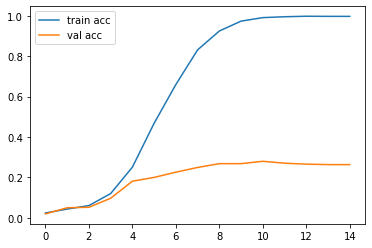

In [28]:
# accuracies
plt.plot(cnn_history.history['accuracy'], label='train acc')
plt.plot(cnn_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('cnn-acc-rps-1.png')
plt.show()

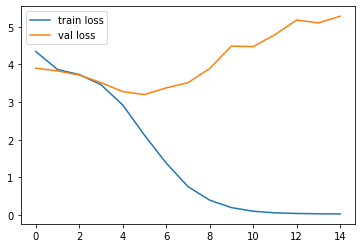

In [29]:
# loss
plt.plot(cnn_history.history['loss'], label='train loss')
plt.plot(cnn_history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('cnn-loss-rps-1.png')
plt.show()

In [30]:
cnn_model.evaluate(test_generator)

  ...
    to  
  ['...']
17/17 [==============================] - 6s 372ms/step - loss: 5.3742 - accuracy: 0.2528


[5.3741749875685745, 0.2527881]

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [32]:
#predict
y_pred=cnn_model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [33]:
#get classification report
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.38      0.33      0.36        15
           1       0.29      0.40      0.33         5
           2       0.25      0.75      0.38         4
           3       0.11      0.50      0.18         2
           4       0.71      0.39      0.50        31
           5       0.08      0.33      0.13         3
           6       0.21      0.20      0.21        15
           7       0.31      0.44      0.36         9
           8       0.47      0.10      0.16        72
           9       0.57      0.19      0.29        42
          10       0.17      0.25      0.20         8
          11       0.09      0.25      0.13         4
          12       0.30      0.20      0.24        15
          13       0.10      0.33      0.15         3
          14       0.09      0.14      0.11         7
          15       0.11      0.20      0.14         5
          16       0.40      0.36      0.38        11
          17       0.46    

C:\Users\robert tan\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\robert tan\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\robert tan\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

[[5 1 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [2 0 1 ... 2 0 0]
 [0 0 0 ... 0 4 1]
 [0 1 0 ... 0 3 4]]


# VGG 19

In [35]:
vgg = VGG19(input_shape=(224,224, 3), weights='imagenet', include_top=False)

In [36]:
# do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [37]:
x = Flatten()(vgg.output)

In [38]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(len(class_list), activation='softmax')(x)

vgg_model = Model(inputs=vgg.input, outputs=prediction)

In [39]:
# view the structure of the model
vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [40]:
vgg_model.compile(
  loss='categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [41]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [42]:
# Include checkpoint 

checkpoint_path = "../checkpoint/training_vgg_frozen//cp-{epoch:04d}.ckpt"


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [43]:
# fit the model
vgg_history = vgg_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    shuffle=True,
    callbacks=[cp_callback],
    verbose=1
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 51 steps, validate for 14 steps
Epoch 1/15
50/51 [============================>.] - ETA: 13s - loss: 4.2710 - accuracy: 0.1984
Epoch 00001: saving model to ../checkpoint/training_vgg_frozen//cp-0001.ckpt
51/51 [==============================] - 900s 18s/step - loss: 4.2535 - accuracy: 0.2006 - val_loss: 2.7004 - val_accuracy: 0.4131
Epoch 2/15
50/51 [============================>.] - ETA: 13s - loss: 0.7296 - accuracy: 0.8212
Epoch 00002: saving model to ../checkpoint/training_vgg_frozen//cp-0002.ckpt
51/51 [==============================] - 889s 17s/step - loss: 0.7294 - accuracy: 0.8223 - val_loss: 2.0362 - val_accuracy: 0.5141
Epoch 3/15
50/51 [============================>.] - ETA: 13s - loss: 0.2124 - accuracy: 0.9728
Epoch 00003: saving model to ../checkpoint/training_vgg_frozen//cp-0003.ckpt
51/51 [==============================] - 869s 17s/step - loss: 0.2130 - accuracy: 0.9715 - val_loss: 1.8830 - val_accuracy: 0.5164

In [44]:
# saving mob model
vgg_model.save('..\model\\vgg')

InvalidArgumentError: Failed to create a directory: ../modelgg; Invalid argument

In [ ]:
# accuracies
plt.plot(vgg_history.history['accuracy'], label='train acc')
plt.plot(vgg_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('vgg-acc-rps-1.png')
plt.show()

In [ ]:
# loss
plt.plot(vgg_history.history['loss'], label='train loss')
plt.plot(vgg_history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [ ]:
vgg_model.evaluate(test_generator)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
#predict
y_pred=vgg_model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
#get classification report
print(classification_report(y_pred,test_y))

In [ ]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

# InceptionV3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
inc = InceptionV3(input_shape=(224,224, 3), weights='imagenet', include_top=False)

In [ ]:
#do not train the pre-trained layers of VGG-19
for layer in inc.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(inc.output)

In [ ]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(len(class_list), activation='softmax')(x)

inc_model = Model(inputs=inc.input, outputs=prediction)

In [ ]:
# view the structure of the model
inc_model.summary()

In [ ]:
inc_model.compile(
  loss='categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
# Include checkpoint 

checkpoint_path = "../checkpoint/training_inception_frozen//cp-{epoch:04d}.ckpt"


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
# fit the model
inc_history = inc_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    shuffle=True,
    callbacks=[cp_callback],
    verbose=1
)

In [ ]:
# saving mob model
inc_model.save('..\model\\inc')

In [ ]:
# accuracies

plt.plot(inc_history.history['accuracy'], label='train acc')
plt.plot(inc_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('inc-acc-rps-1.png')
plt.show()

In [ ]:
# loss

plt.plot(inc_history.history['loss'], label='train loss')
plt.plot(inc_history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('inc-loss-rps-1.png')
plt.show()

In [ ]:
inc_model.evaluate(test_generator)

In [ ]:
#predict
y_pred=inc_model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
#get classification report
print(classification_report(y_pred,test_y))

In [ ]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

# MobileNetV2

In [16]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [17]:
mob = MobileNetV2(input_shape=(224,224, 3), weights='imagenet', include_top=False)

In [18]:
#do not train the pre-trained layers of VGG-19
for layer in mob.layers:
    layer.trainable = False

In [19]:
x = Flatten()(mob.output)

In [20]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(len(class_list), activation='softmax')(x)

mob_model = Model(inputs=mob.input, outputs=prediction)

In [21]:
# view the structure of the model
mob_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [22]:
mob_model.compile(
  loss='categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [23]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [24]:
# Include checkpoint 

checkpoint_path = "../checkpoint/training_mobilenet_frozen//cp-{epoch:04d}.ckpt"


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [38]:
# fit the model
mob_history = mob_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    shuffle=True,
    callbacks=[cp_callback],
    verbose=1
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 51 steps, validate for 14 steps
Epoch 1/15
50/51 [============================>.] - ETA: 3s - loss: 0.5121 - accuracy: 0.9425
Epoch 00001: saving model to ../checkpoint/training_mobilenet_frozen//cp-0001.ckpt
51/51 [==============================] - 195s 4s/step - loss: 0.5022 - accuracy: 0.9437 - val_loss: 10.1056 - val_accuracy: 0.3451
Epoch 2/15
50/51 [============================>.] - ETA: 4s - loss: 0.1477 - accuracy: 0.9754
Epoch 00002: saving model to ../checkpoint/training_mobilenet_frozen//cp-0002.ckpt
51/51 [==============================] - 262s 5s/step - loss: 0.1448 - accuracy: 0.9759 - val_loss: 11.6443 - val_accuracy: 0.3028
Epoch 3/15
50/51 [============================>.] - ETA: 5s - loss: 0.0888 - accuracy: 0.9861 
Epoch 00003: saving model to ../checkpoint/training_mobilenet_frozen//cp-0003.ckpt
51/51 [==============================] - 272s 5s/step - loss: 0.0874 - accuracy: 0.9864 - val_loss: 11.6920 - val_

In [39]:
# saving mob model
mob_model.save('..\model\\mob')

INFO:tensorflow:Assets written to: ..\model\mob\assets


In [ ]:
# model = tf.keras.models.load_model('../model/cnn_model_finished_w_variation_all')

In [ ]:
# accuracies

plt.plot(mob_history.history['accuracy'], label='train acc')
plt.plot(mob_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('mob-acc-rps-1.png')
plt.show()

In [ ]:
# loss

plt.plot(mob_history.history['loss'], label='train loss')
plt.plot(mob_history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('mob-loss-rps-1.png')
plt.show()

In [28]:
mob_model.evaluate(test_generator)

  ...
    to  
  ['...']
17/17 [==============================] - 10s 608ms/step - loss: 12.9324 - accuracy: 0.2435


[12.932397337520824, 0.24349442]

In [33]:
#predict
y_pred=mob_model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [30]:
#get classification report
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.08      1.00      0.15         1
           3       0.33      0.50      0.40         6
           4       0.06      0.50      0.11         2
           5       0.08      1.00      0.15         1
           6       0.21      0.75      0.33         4
           7       0.15      1.00      0.27         2
           8       0.20      1.00      0.33         3
           9       0.14      0.50      0.22         4
          10       0.17      0.67      0.27         3
          11       0.45      0.12      0.19        42
          12       0.60      0.43      0.50        14
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          16       0.30      0.50      0.37         6
          17       0.31    

C:\Users\robert tan\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\robert tan\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\robert tan\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

# EfficientNetB3


In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input

In [ ]:
enet = EfficientNetB3(input_shape=(224,224, 3), weights='imagenet', include_top=False)

In [ ]:
#do not train the pre-trained layers of VGG-19
for layer in enet.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(enet.output)

In [ ]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(len(class_list), activation='softmax')(x)

enet_model = Model(inputs=enet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

In [ ]:
enet_model.compile(
  loss='categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:

early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
# Include checkpoint 

checkpoint_path = "../checkpoint/training_enet_frozen//cp-{epoch:04d}.ckpt"


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
# fit the model
enet_history = enet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    shuffle=True,
    callbacks=[cp_callback],
    verbose=1
)

In [ ]:
# saving mob model
enet_model.save('..\model\enet')

In [ ]:
# accuracies

plt.plot(enet_history.history['accuracy'], label='train acc')
plt.plot(enet_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('enet-acc-rps-1.png')
plt.show()

In [ ]:
# loss

plt.plot(enet_history.history['loss'], label='train loss')
plt.plot(enet_history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('enet-loss-rps-1.png')
plt.show()

In [ ]:
enet_model.evaluate(test_generator)

In [ ]:
#predict
y_pred=enet_model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
#get classification report
print(classification_report(y_pred,test_y))

In [ ]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

# MobileNetV2 (Augmented Data)

In [40]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [41]:
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1, 
    zoom_range = 0.1,
    brightness_range = [0.7,1.3]
)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [42]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1615 images belonging to 50 classes.
Found 538 images belonging to 50 classes.
Found 426 images belonging to 50 classes.


In [46]:
aug_mob = MobileNetV2(input_shape=(224,224, 3), weights='imagenet', include_top=False)

In [47]:
#do not train the pre-trained layers of VGG-19
for layer in aug_mob.layers:
    layer.trainable = False

In [48]:
x = Flatten()(aug_mob.output)

In [49]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(len(class_list), activation='softmax')(x)

aug_mob_model = Model(inputs=aug_mob.input, outputs=prediction)

In [50]:
# view the structure of the model
aug_mob_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [51]:
aug_mob_model.compile(
  loss='categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [52]:

early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [53]:
# Include checkpoint 

checkpoint_path = "../checkpoint/training_augmented_mobilenet_frozen//cp-{epoch:04d}.ckpt"


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [54]:
# fit the model
aug_mob_history = aug_mob_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    shuffle=True,
    callbacks=[cp_callback],
    verbose=1
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 51 steps, validate for 14 steps
Epoch 1/15
50/51 [============================>.] - ETA: 3s - loss: 9.2126 - accuracy: 0.3765
Epoch 00001: saving model to ../checkpoint/training_augmented_mobilenet_frozen//cp-0001.ckpt
51/51 [==============================] - 225s 4s/step - loss: 9.1320 - accuracy: 0.3802 - val_loss: 11.2993 - val_accuracy: 0.2793
Epoch 2/15
50/51 [============================>.] - ETA: 4s - loss: 0.6183 - accuracy: 0.9394
Epoch 00002: saving model to ../checkpoint/training_augmented_mobilenet_frozen//cp-0002.ckpt
51/51 [==============================] - 243s 5s/step - loss: 0.6233 - accuracy: 0.9393 - val_loss: 11.1167 - val_accuracy: 0.3216
Epoch 3/15
50/51 [============================>.] - ETA: 2s - loss: 0.0422 - accuracy: 0.9893
Epoch 00003: saving model to ../checkpoint/training_augmented_mobilenet_frozen//cp-0003.ckpt
51/51 [==============================] - 172s 3s/step - loss: 0.0414 - accuracy: 0.98

In [56]:
# saving mob model
aug_mob_model.save('..\model\\aug_mob')

INFO:tensorflow:Assets written to: ..\model\aug_mob\assets


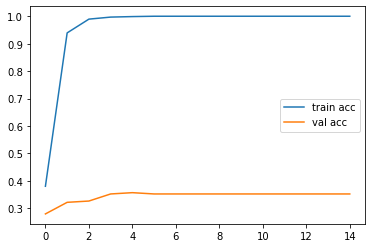

In [57]:
# accuracies

plt.plot(aug_mob_history.history['accuracy'], label='train acc')

plt.plot(aug_mob_history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('aug-mob-acc-rps-1.png')

plt.show()

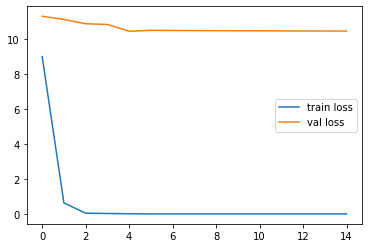

In [58]:
# loss
plt.plot(aug_mob_history.history['loss'], label='train loss')
plt.plot(aug_mob_history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('aug-mob-loss-rps-1.png')
plt.show()

In [59]:
aug_mob_model.evaluate(test_generator)

  ...
    to  
  ['...']
17/17 [==============================] - 10s 602ms/step - loss: 10.9700 - accuracy: 0.3197


[10.969999593846937, 0.3197026]

In [66]:
#predict
y_pred=aug_mob_model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [67]:
#get classification report
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.15      1.00      0.27         2
           1       0.00      0.00      0.00         1
           2       0.25      0.50      0.33         6
           3       0.22      0.67      0.33         3
           4       0.88      0.20      0.33        74
           5       0.08      0.33      0.13         3
           6       0.29      1.00      0.44         4
           7       0.15      1.00      0.27         2
           8       0.33      0.29      0.31        17
           9       0.21      0.43      0.29         7
          10       0.08      1.00      0.15         1
          11       0.00      0.00      0.00         1
          12       0.60      0.32      0.41        19
          13       0.00      0.00      0.00         0
          14       0.45      0.28      0.34        18
          15       0.11      0.33      0.17         3
          16       0.30      0.50      0.37         6
          17       0.38    

C:\Users\robert tan\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\robert tan\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\robert tan\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

[[2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 3 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 5 0]
 [0 1 0 ... 0 0 8]]


# MobileNetV2 (Unfrozen)

In [69]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [70]:
train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [71]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1615 images belonging to 50 classes.
Found 538 images belonging to 50 classes.
Found 426 images belonging to 50 classes.


In [74]:
unfrozen_mob = MobileNetV2(input_shape=(224,224, 3), weights='imagenet', include_top=False)

In [75]:
#do not train the pre-trained layers of VGG-19
for layer in unfrozen_mob.layers:
    layer.trainable = True

In [76]:
x = Flatten()(unfrozen_mob.output)

In [77]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(len(class_list), activation='softmax')(x)

unfrozen_mob_model = Model(inputs=unfrozen_mob.input, outputs=prediction)

In [78]:
# view the structure of the model
unfrozen_mob_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [79]:
unfrozen_mob_model.compile(
  loss='categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [80]:

early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [81]:
# Include checkpoint 

checkpoint_path = "../checkpoint/training_mobilenet_unfrozen//cp-{epoch:04d}.ckpt"


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [82]:
# fit the model
unfrozen_mob_history = unfrozen_mob_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    shuffle=True,
    callbacks=[cp_callback],
    verbose=1
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 51 steps, validate for 14 steps
Epoch 1/15
50/51 [============================>.] - ETA: 8s - loss: 5.3705 - accuracy: 0.2072 
Epoch 00001: saving model to ../checkpoint/training_mobilenet_unfrozen//cp-0001.ckpt
51/51 [==============================] - 440s 9s/step - loss: 5.3956 - accuracy: 0.2074 - val_loss: 120.4851 - val_accuracy: 0.0235
Epoch 2/15
50/51 [============================>.] - ETA: 3s - loss: 3.9497 - accuracy: 0.3784
Epoch 00002: saving model to ../checkpoint/training_mobilenet_unfrozen//cp-0002.ckpt
51/51 [==============================] - 191s 4s/step - loss: 3.9397 - accuracy: 0.3802 - val_loss: 50.0646 - val_accuracy: 0.0376
Epoch 3/15
50/51 [============================>.] - ETA: 4s - loss: 2.6096 - accuracy: 0.5130
Epoch 00003: saving model to ../checkpoint/training_mobilenet_unfrozen//cp-0003.ckpt
51/51 [==============================] - 230s 5s/step - loss: 2.5946 - accuracy: 0.5121 - val_loss: 107.232

KeyboardInterrupt: 

In [ ]:
# saving mob model
unfrozen_mob_model.save('..\model\\unfrozen_mob')

In [ ]:
# accuracies

plt.plot(unfrozen_mob_history.history['accuracy'], label='train acc')

plt.plot(unfrozen_mob_history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('unfrozen-mob-acc-rps-1.png')

plt.show()

In [ ]:
# loss
plt.plot(unfrozen_mob_history.history['loss'], label='train loss')
plt.plot(unfrozen_mob_history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('unfrozen-mob-loss-rps-1.png')
plt.show()

In [ ]:
unfrozen_mob_model.evaluate(test_generator)

In [ ]:
#predict
y_pred=unfrozen_mob_model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
#get classification report
print(classification_report(y_pred,test_y))

In [ ]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

# 2nd unfrozen mob

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import  MobileNetV2

def create_mobilenet_unfreezeAll_finetune():
    image_size = [224,224]
    #instantiate transfer learning wihtout including top layer
    mobilenetv2 = MobileNetV2(input_shape= image_size + [3], weights = 'imagenet', include_top = False)

    # UNFREEZE all layers first
    mobilenetv2.trainable = True 

    # initial layers 
    x = tf.keras.layers.GlobalAveragePooling2D()(mobilenetv2.output)
    x = tf.keras.layers.Reshape((1, 1, 1280))(x)
    x = tf.keras.layers.Dropout(0.3, name='Dropout')(x)
    x = tf.keras.layers.Conv2D(len(folders), (1, 1), padding='same')(x)
    x = tf.keras.layers.Activation('softmax', name='final_activation')(x)
    prediction = tf.keras.layers.Reshape((len(class_list),), name='output')(x)
   
    # create a model object 
    model_mobilenet = Model(inputs = mobilenetv2.input, outputs = prediction)
    
    # Compile model
    base_learning_rate = 0.001

    model_mobilenet.compile(
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/100),
        loss= 'categorical_crossentropy',
        metrics=['accuracy']
        )
                           
    
    return model_mobilenet